Importing all the necessary libraries:

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import umap
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.decomposition import FastICA
from sklearn.linear_model import ElasticNet  
from sklearn.ensemble import GradientBoostingRegressor

Commonly Used Functions:

In [41]:
def adjusted_r2(r2, X):
    n = X.shape[0]
    p = X.shape[1]
    return 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

def results(X_train, X_test, y_train, y_test, y_train_pred, y_test_pred):
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)
    adj_r2_train = adjusted_r2(r2_train, X_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)
    adj_r2_test = adjusted_r2(r2_test, X_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    print(f"Train Data Metrics:\n"
        f"MSE: {mse_train}\nRMSE: {rmse_train}\nR2: {r2_train}\n"
        f"Adjusted R2: {adj_r2_train}\nMAE: {mae_train}\n")
    print(f"Test Data Metrics:\n"
        f"MSE: {mse_test}\nRMSE: {rmse_test}\nR2: {r2_test}\n"
        f"Adjusted R2: {adj_r2_test}\nMAE: {mae_test}\n")
    

Splitting the Dataset into train and test:

In [42]:
electricity_bill_df = pd.read_csv('ElectricityBILL.csv')

EDA:

In [43]:
numerical_features = electricity_bill_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = electricity_bill_df.select_dtypes(include=['object']).columns.tolist()


plt.figure(figsize=(8, 6))
sns.pairplot(electricity_bill_df)
plt.suptitle("Pair Plot of Numerical Features", y=1)
plt.show()

for cat_feature in categorical_features:
    plt.figure(figsize=(4, 3))
    sns.boxplot(x=cat_feature, y='Electricity_Bill', data=electricity_bill_df)
    plt.xticks(rotation=45)
    plt.title(f"Box Plot of {cat_feature}")
plt.show()

for cat_feature in categorical_features:
    plt.figure(figsize=(4, 3))
    sns.violinplot(x=cat_feature, y='Electricity_Bill', data=electricity_bill_df)
    plt.xticks(rotation=45)
    plt.title(f"Violin Plot of {cat_feature}")
plt.show()

for cat_feature in categorical_features:
    plt.figure(figsize=(4, 3))
    sns.countplot(x=cat_feature, data=electricity_bill_df)
    plt.xticks(rotation=45)
    plt.title(f"Count Plot of {cat_feature}")
plt.show()

plt.figure(figsize=(8, 6))
correlation_matrix = electricity_bill_df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

<Figure size 800x600 with 0 Axes>

C:\Users\himan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


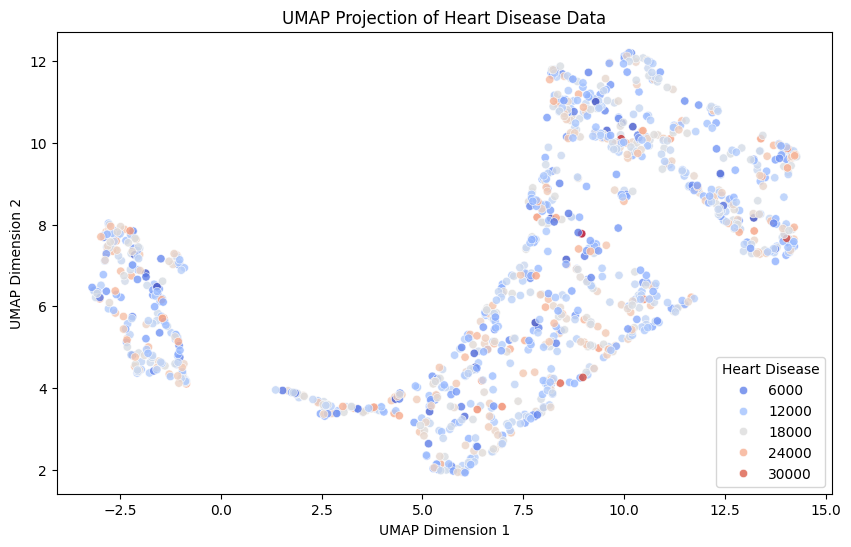

In [21]:
X = electricity_bill_df[numerical_features].drop(columns=['Electricity_Bill'])
y = electricity_bill_df['Electricity_Bill']           

reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1],hue=y, palette='coolwarm', alpha=0.8)

plt.title('UMAP Projection of Heart Disease Data')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Heart Disease', loc='lower right')
plt.show()

In [34]:
X = electricity_bill_df.drop(columns=['Electricity_Bill'])
y = electricity_bill_df['Electricity_Bill']

label_encoder = LabelEncoder()
X['Building_Type'] = label_encoder.fit_transform(X['Building_Type'])
X['Building_Status'] = label_encoder.fit_transform(X['Building_Status'])
X['Maintenance_Priority'] = label_encoder.fit_transform(X['Maintenance_Priority'])


scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[numerical_features[:-1]] = scaler.fit_transform(X_train[numerical_features[:-1]])
X_test[numerical_features[:-1]] = scaler.transform(X_test[numerical_features[:-1]])
X_train_C=X_train.copy() #copy for later parts
X_test_C=X_test.copy()



model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
results(X_train, X_test, y_train, y_test, y_train_pred, y_test_pred)

Train Data Metrics:
MSE: 24475013.16847547
RMSE: 4947.222773281538
R2: 0.013922520844610209
Adjusted R2: -0.0011091480449536562
MAE: 4006.3284693293604

Test Data Metrics:
MSE: 24278016.155742623
RMSE: 4927.272689403604
R2: 3.7344733075372893e-05
Adjusted R2: -0.0640628254763429
MAE: 3842.409312558516



In [35]:
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print("Selected Features using RFE:")
print(selected_features) 
X_train = X_train[selected_features]
X_test = X_test[selected_features]


model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
results(X_train, X_test, y_train, y_test, y_train_pred, y_test_pred)

Selected Features using RFE:
Index(['Building_Type', 'Green_Certified', 'Number_of_Residents'], dtype='object')
Train Data Metrics:
MSE: 24569032.90689799
RMSE: 4956.715939702212
R2: 0.010134545491283897
Adjusted R2: 0.007153023037944406
MAE: 4006.4733775147365

Test Data Metrics:
MSE: 23941409.062998377
RMSE: 4892.995918964002
R2: 0.01390151386794114
Adjusted R2: 0.0018759225736477703
MAE: 3813.948128176773



In [36]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(electricity_bill_df[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))
data_encoded = pd.concat([electricity_bill_df.drop(columns=categorical_features), encoded_df], axis=1)



scaler = StandardScaler()
X = data_encoded.drop(columns=['Electricity_Bill'])
y = data_encoded['Electricity_Bill']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[numerical_features[:-1]] = scaler.fit_transform(X_train[numerical_features[:-1]])
X_test[numerical_features[:-1]] = scaler.transform(X_test[numerical_features[:-1]])



ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)
results(X_train, X_test, y_train, y_test, y_train_pred, y_test_pred)

Train Data Metrics:
MSE: 24188934.33771263
RMSE: 4918.224714031744
R2: 0.025448393796608904
Adjusted R2: 0.0065540259212369945
MAE: 3976.7358814937825

Test Data Metrics:
MSE: 24128285.03905578
RMSE: 4912.055072885053
R2: 0.006204468276357233
Adjusted R2: -0.07589168434429161
MAE: 3797.5125183935425



In [37]:
def linearRegressor(X_train_ICA,X_test_ICA,y_train,y_test):
      from sklearn.linear_model import LinearRegression
      model = LinearRegression()
      model.fit(X_train_ICA, y_train)
      y_train_pred = model.predict(X_train_ICA)
      y_test_pred = model.predict(X_test_ICA)
      results(X_train_ICA, X_test_ICA, y_train, y_test, y_train_pred, y_test_pred)

optimal_components = [4,5,6,8]
for i in optimal_components:
      ica = FastICA(n_components=i, random_state=42)
      X_train_ICA = ica.fit_transform(X_train)
      X_test_ICA = ica.transform(X_test)
      print(f"ICA Components: {i}")
      linearRegressor(X_train_ICA,X_test_ICA,y_train,y_test)

ICA Components: 4
Train Data Metrics:
MSE: 24794328.838293616
RMSE: 4979.390408302367
R2: 0.001057563895183411
Adjusted R2: -0.002958285094182722
MAE: 4009.147037758438

Test Data Metrics:
MSE: 24354011.551301703
RMSE: 4934.978373944683
R2: -0.003092752761045592
Adjusted R2: -0.01946977729591981
MAE: 3841.59613134479

ICA Components: 5
Train Data Metrics:
MSE: 24642116.20276511
RMSE: 4964.082614417805
R2: 0.00719008161455581
Adjusted R2: 0.0021960679405846895
MAE: 4016.241603637738

Test Data Metrics:
MSE: 24521135.156151857
RMSE: 4951.881981242269
R2: -0.009976237910395813
Adjusted R2: -0.03067247229380543
MAE: 3855.21771310065

ICA Components: 6
Train Data Metrics:
MSE: 24639512.047189057
RMSE: 4963.820307705453
R2: 0.007295000829433684
Adjusted R2: 0.0012967833117867311
MAE: 4016.523062002582

Test Data Metrics:
MSE: 24477194.732651733
RMSE: 4947.443252090086
R2: -0.008166420243463257
Adjusted R2: -0.03305941827416614
MAE: 3849.9651899386654

ICA Components: 8
Train Data Metrics:
MS

In [38]:
X_train=X_train_C
X_test=X_test_C

Alphas=[0.01,0.05,0.1,0.5,1,5,10,50,100]
for i in range(len(Alphas)):
    print(f"Alpha: {Alphas[i]}")
    elasticnet_model = ElasticNet(alpha=i, l1_ratio=0.5, random_state=42) 
    elasticnet_model.fit(X_train, y_train)
    y_train_pred = elasticnet_model.predict(X_train)
    y_test_pred = elasticnet_model.predict(X_test)
    results(X_train, X_test, y_train, y_test,y_train_pred, y_test_pred)


Alpha: 0.01
Train Data Metrics:
MSE: 24475013.16847547
RMSE: 4947.222773281538
R2: 0.013922520844610209
Adjusted R2: -0.0011091480449536562
MAE: 4006.3284693293604

Test Data Metrics:
MSE: 24278016.155742623
RMSE: 4927.272689403604
R2: 3.7344733075372893e-05
Adjusted R2: -0.0640628254763429
MAE: 3842.409312558516

Alpha: 0.05
Train Data Metrics:
MSE: 24512724.40447468
RMSE: 4951.032660412843
R2: 0.012403167197118536
Adjusted R2: -0.002651662571218072
MAE: 4001.8521746187616

Test Data Metrics:
MSE: 24230582.313613564
RMSE: 4922.4569387261845
R2: 0.0019910492870476304
Adjusted R2: -0.06198388345096206
MAE: 3834.934893456054

Alpha: 0.1
Train Data Metrics:
MSE: 24560029.57787764
RMSE: 4955.80766150964
R2: 0.010497281965551664
Adjusted R2: -0.00458660093131491
MAE: 4001.845151854596

Test Data Metrics:
MSE: 24235440.53643744
RMSE: 4922.950389394295
R2: 0.0017909488602385615
Adjusted R2: -0.062196810828207605
MAE: 3832.654377707541

Alpha: 0.5
Train Data Metrics:
MSE: 24597783.974117033
RM

C:\Users\himan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1351: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\himan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\himan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider i

In [39]:
gbr_model = GradientBoostingRegressor(random_state=42)
X_train=X_train_C
X_test=X_test_C
gbr_model.fit(X_train, y_train)
y_train_pred = gbr_model.predict(X_train)
y_test_pred = gbr_model.predict(X_test)

results(X_train, X_test, y_train, y_test, y_train_pred, y_test_pred)

Train Data Metrics:
MSE: 14926446.25730777
RMSE: 3863.4759294329465
R2: 0.398626166333897
Adjusted R2: 0.38945888228410885
MAE: 3092.748188686501

Test Data Metrics:
MSE: 24405496.61674575
RMSE: 4940.1919615279885
R2: -0.005213319055167753
Adjusted R2: -0.06965007027665293
MAE: 3813.630549423027

